# Research topic: Bankruptcy prediction using big data techniques

In the era of massive information flow, big data techniques have emerged as a game-changing approach to handling and deriving value from vast and complex datasets. These techniques involve innovative tools like distributed computing, parallel processing, and machine learning to process, analyze, and extract insights from data that surpasses traditional processing capacities. With a focus on the three key dimensions of volume, velocity, and variety, big data techniques offer the potential to uncover hidden patterns, predict trends, and inform decision-making across various sectors and industries. 

In this notebook, we will look forward for spark implementation bankrucptcy predcition techniques using Taiwanese dataset.

lets begin

# Importing the libraries

In [1]:
# IMPORTING LIBRARIES

# General Libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


import warnings
warnings.filterwarnings(action="ignore")


from imblearn.over_sampling import SMOTE



from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, classification_report, f1_score

from sklearn.decomposition import PCA
import plotly.express as px

# spark
from pyspark.sql import SparkSession
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.sql.functions import col
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


# Data Description

In [2]:
# IMPORTING DATA

# taiwan data 
tbank_data = pd.read_csv('data.csv')


In [3]:
# Print First 5 records of Taiwan data
tbank_data.head()

Bankrupt?   ROA(C) before interest and depreciation before interest   
0          1                                           0.370594         \
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax   
0                                 0.424389  \
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax   
0                                           0.405750   \
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin   
0                 0.601457                      0.601457  \
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate   
0                0.998969                    0.796887  \
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue   
0                      0.808809                                      0.302646  \
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price   
0  ...                     0.716845                    0.009219  \
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales   
0             0.622879                0.601453  \
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity   
0                             0.827890              0.290202  \
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)   
0                             0.026601  \
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag   
0                                           0.564050                   1  \
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

# Taiwanese Exploratory data analaysis [ EDA ]

In [4]:
tbank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
# checking for duplicate values
tbank_data.duplicated().sum()

0

In [6]:
tbank_data.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest   
count  6819.000000                                        6819.000000         \
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax   
count                              6819.000000  \
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax   
count                                        6819.000000   \
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin   
count              6819.000000                   6819.000000  \
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate   
count             6819.000000                 6819.000000  \
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate   
count                   6819.000000  \
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...   
count                                   6819.000000  ...  \
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price   
count                  6819.000000                6.819000e+03  \
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

In [7]:
# The classes are heavily skewed we need to solve this issue later.
# counting the bankrupt and non-bankrupt companies

print(tbank_data['Bankrupt?'].value_counts())
print('-'* 30)
print('Non-Bankrupt: ', round(tbank_data['Bankrupt?'].value_counts()[0]/len(tbank_data) * 100,2), '% of the Taiwan dataset')
print('Bankrupt: ', round(tbank_data['Bankrupt?'].value_counts()[1]/len(tbank_data) * 100,2), '% of the Taiwan dataset')

Bankrupt?
0    6599
1     220
Name: count, dtype: int64
------------------------------
Non-Bankrupt:  96.77 % of the Taiwan dataset
Bankrupt:  3.23 % of the Taiwan dataset


In [8]:
# checking for categorical features 

numeric_features = tbank_data.dtypes[tbank_data.dtypes != 'int64'].index
categorical_features = tbank_data.dtypes[tbank_data.dtypes == 'int64'].index

cat = tbank_data[categorical_features].columns.tolist()
num = tbank_data[numeric_features].columns.tolist()

print('categorical features are', cat)

categorical features are ['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag']


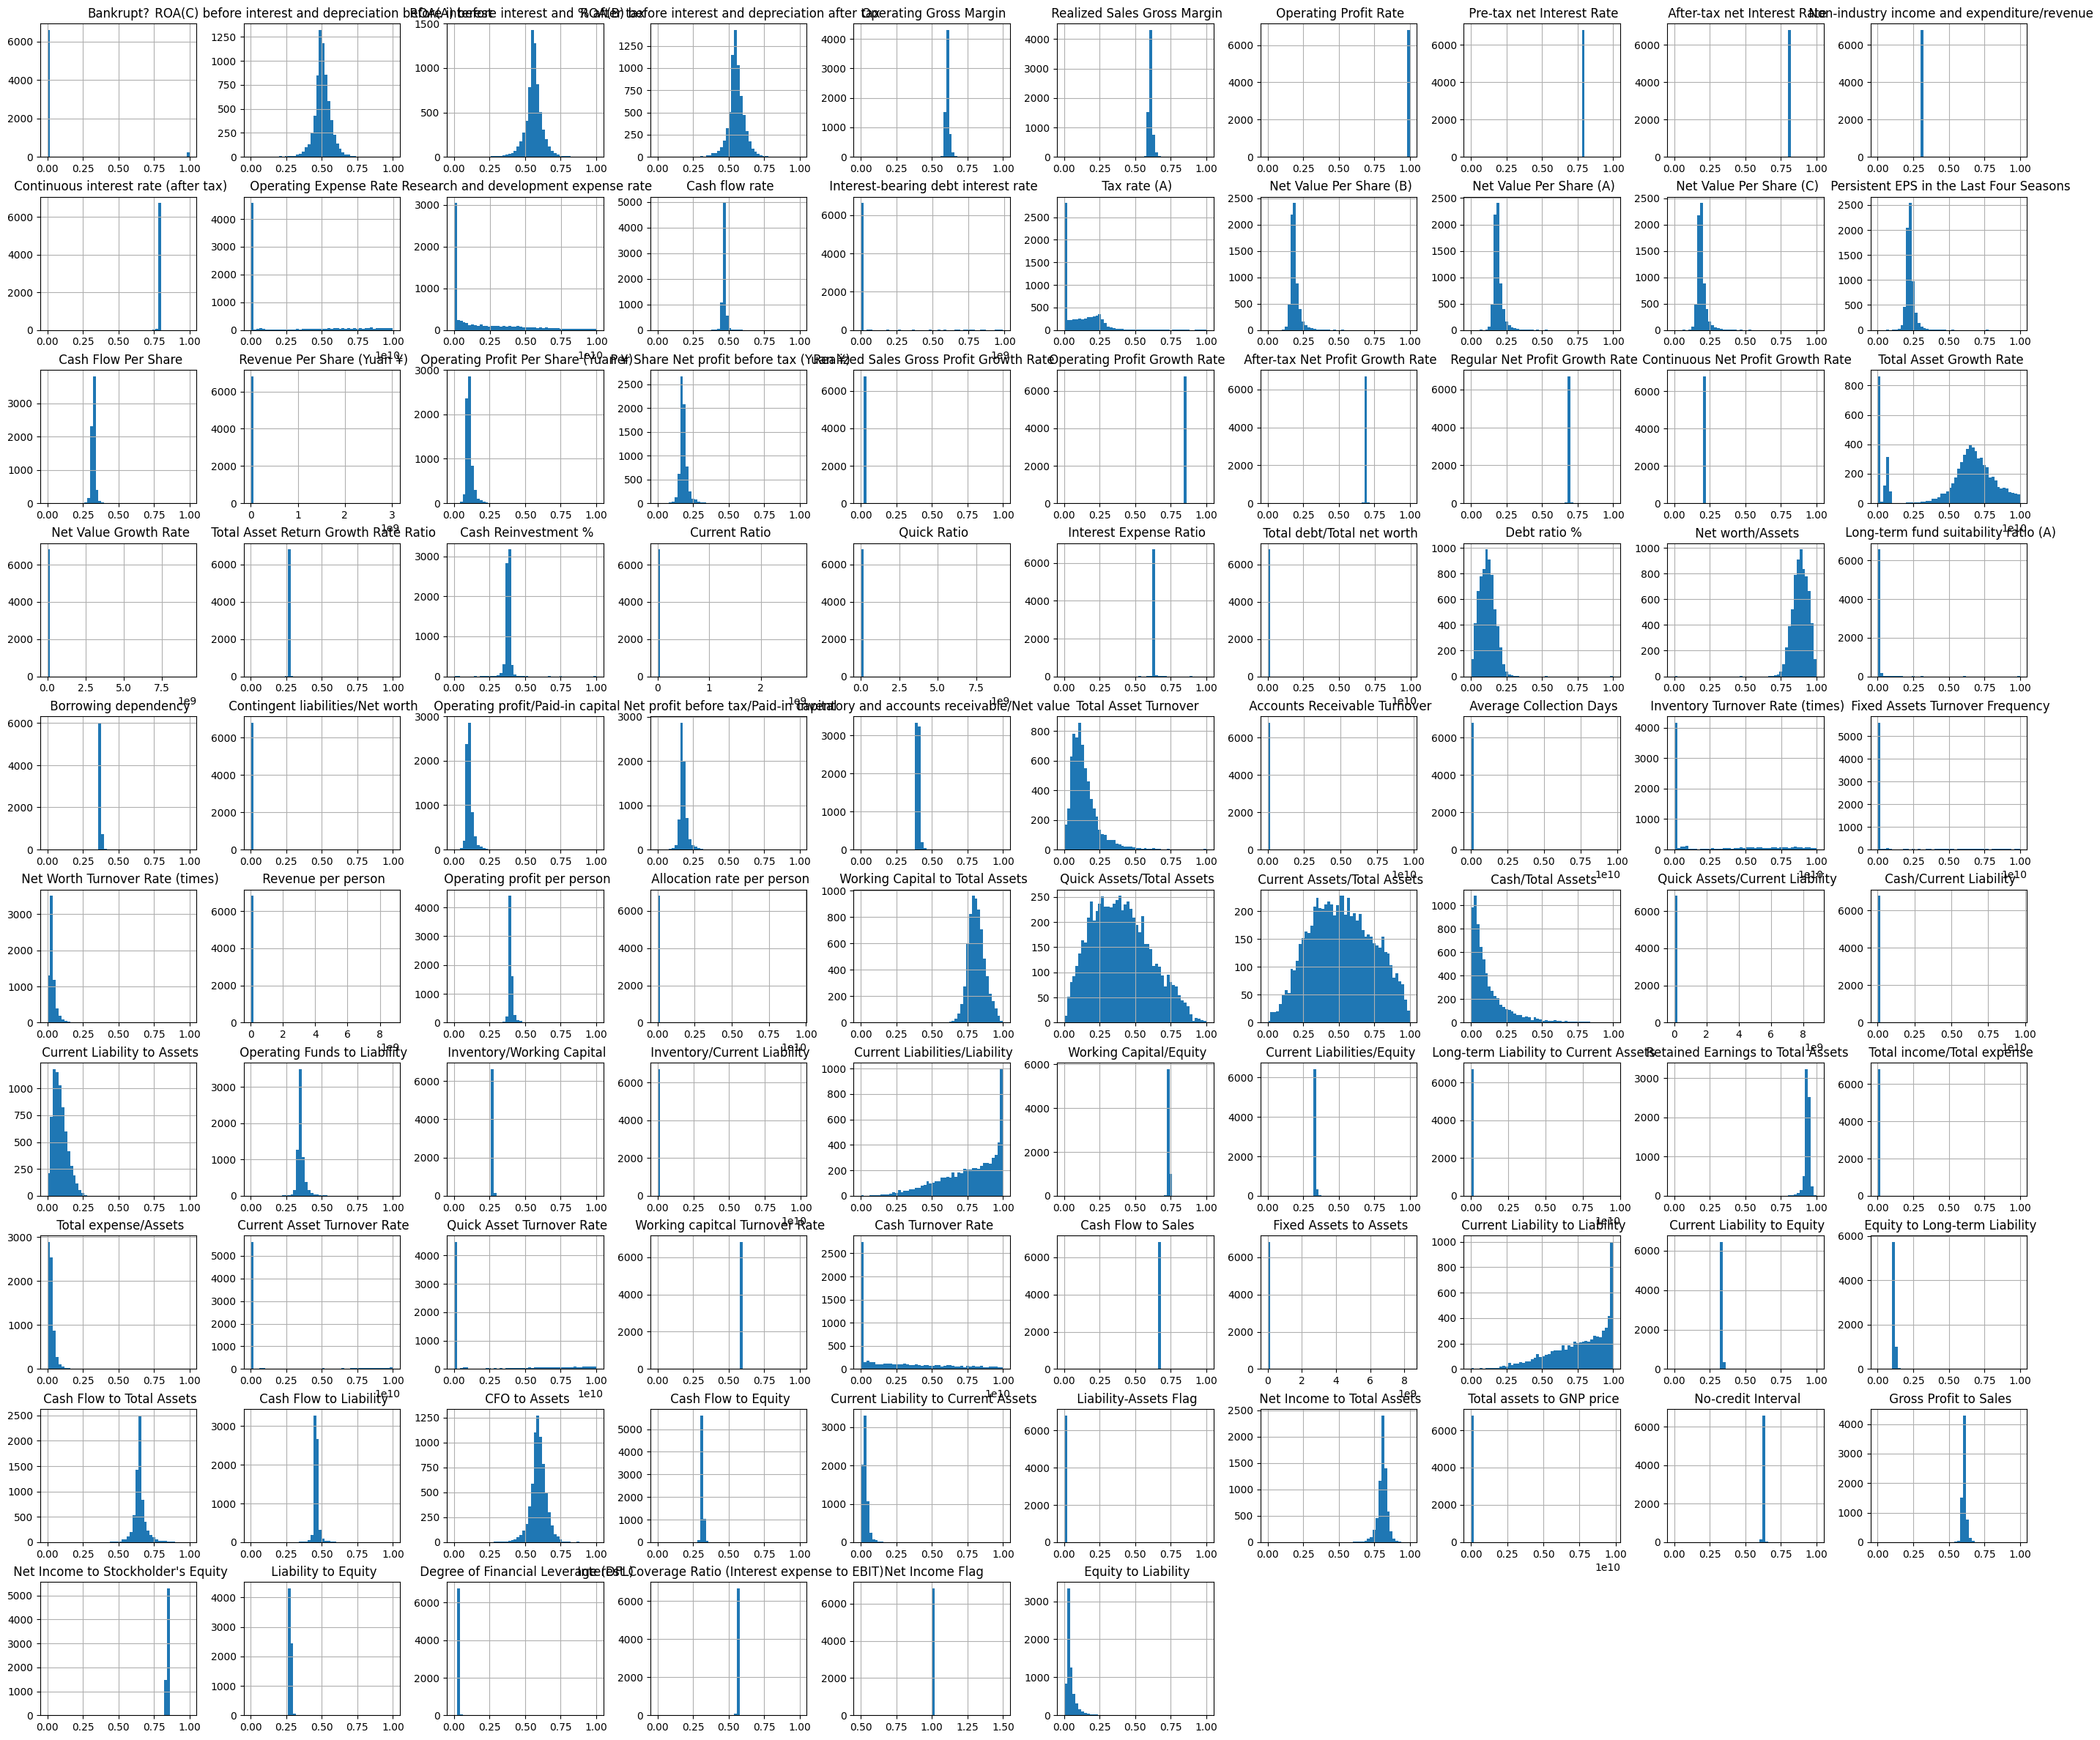

In [9]:
# histograms of numerical Taiwanese data
tbank_data.hist(figsize = (35,30), bins = 50)
plt.show()

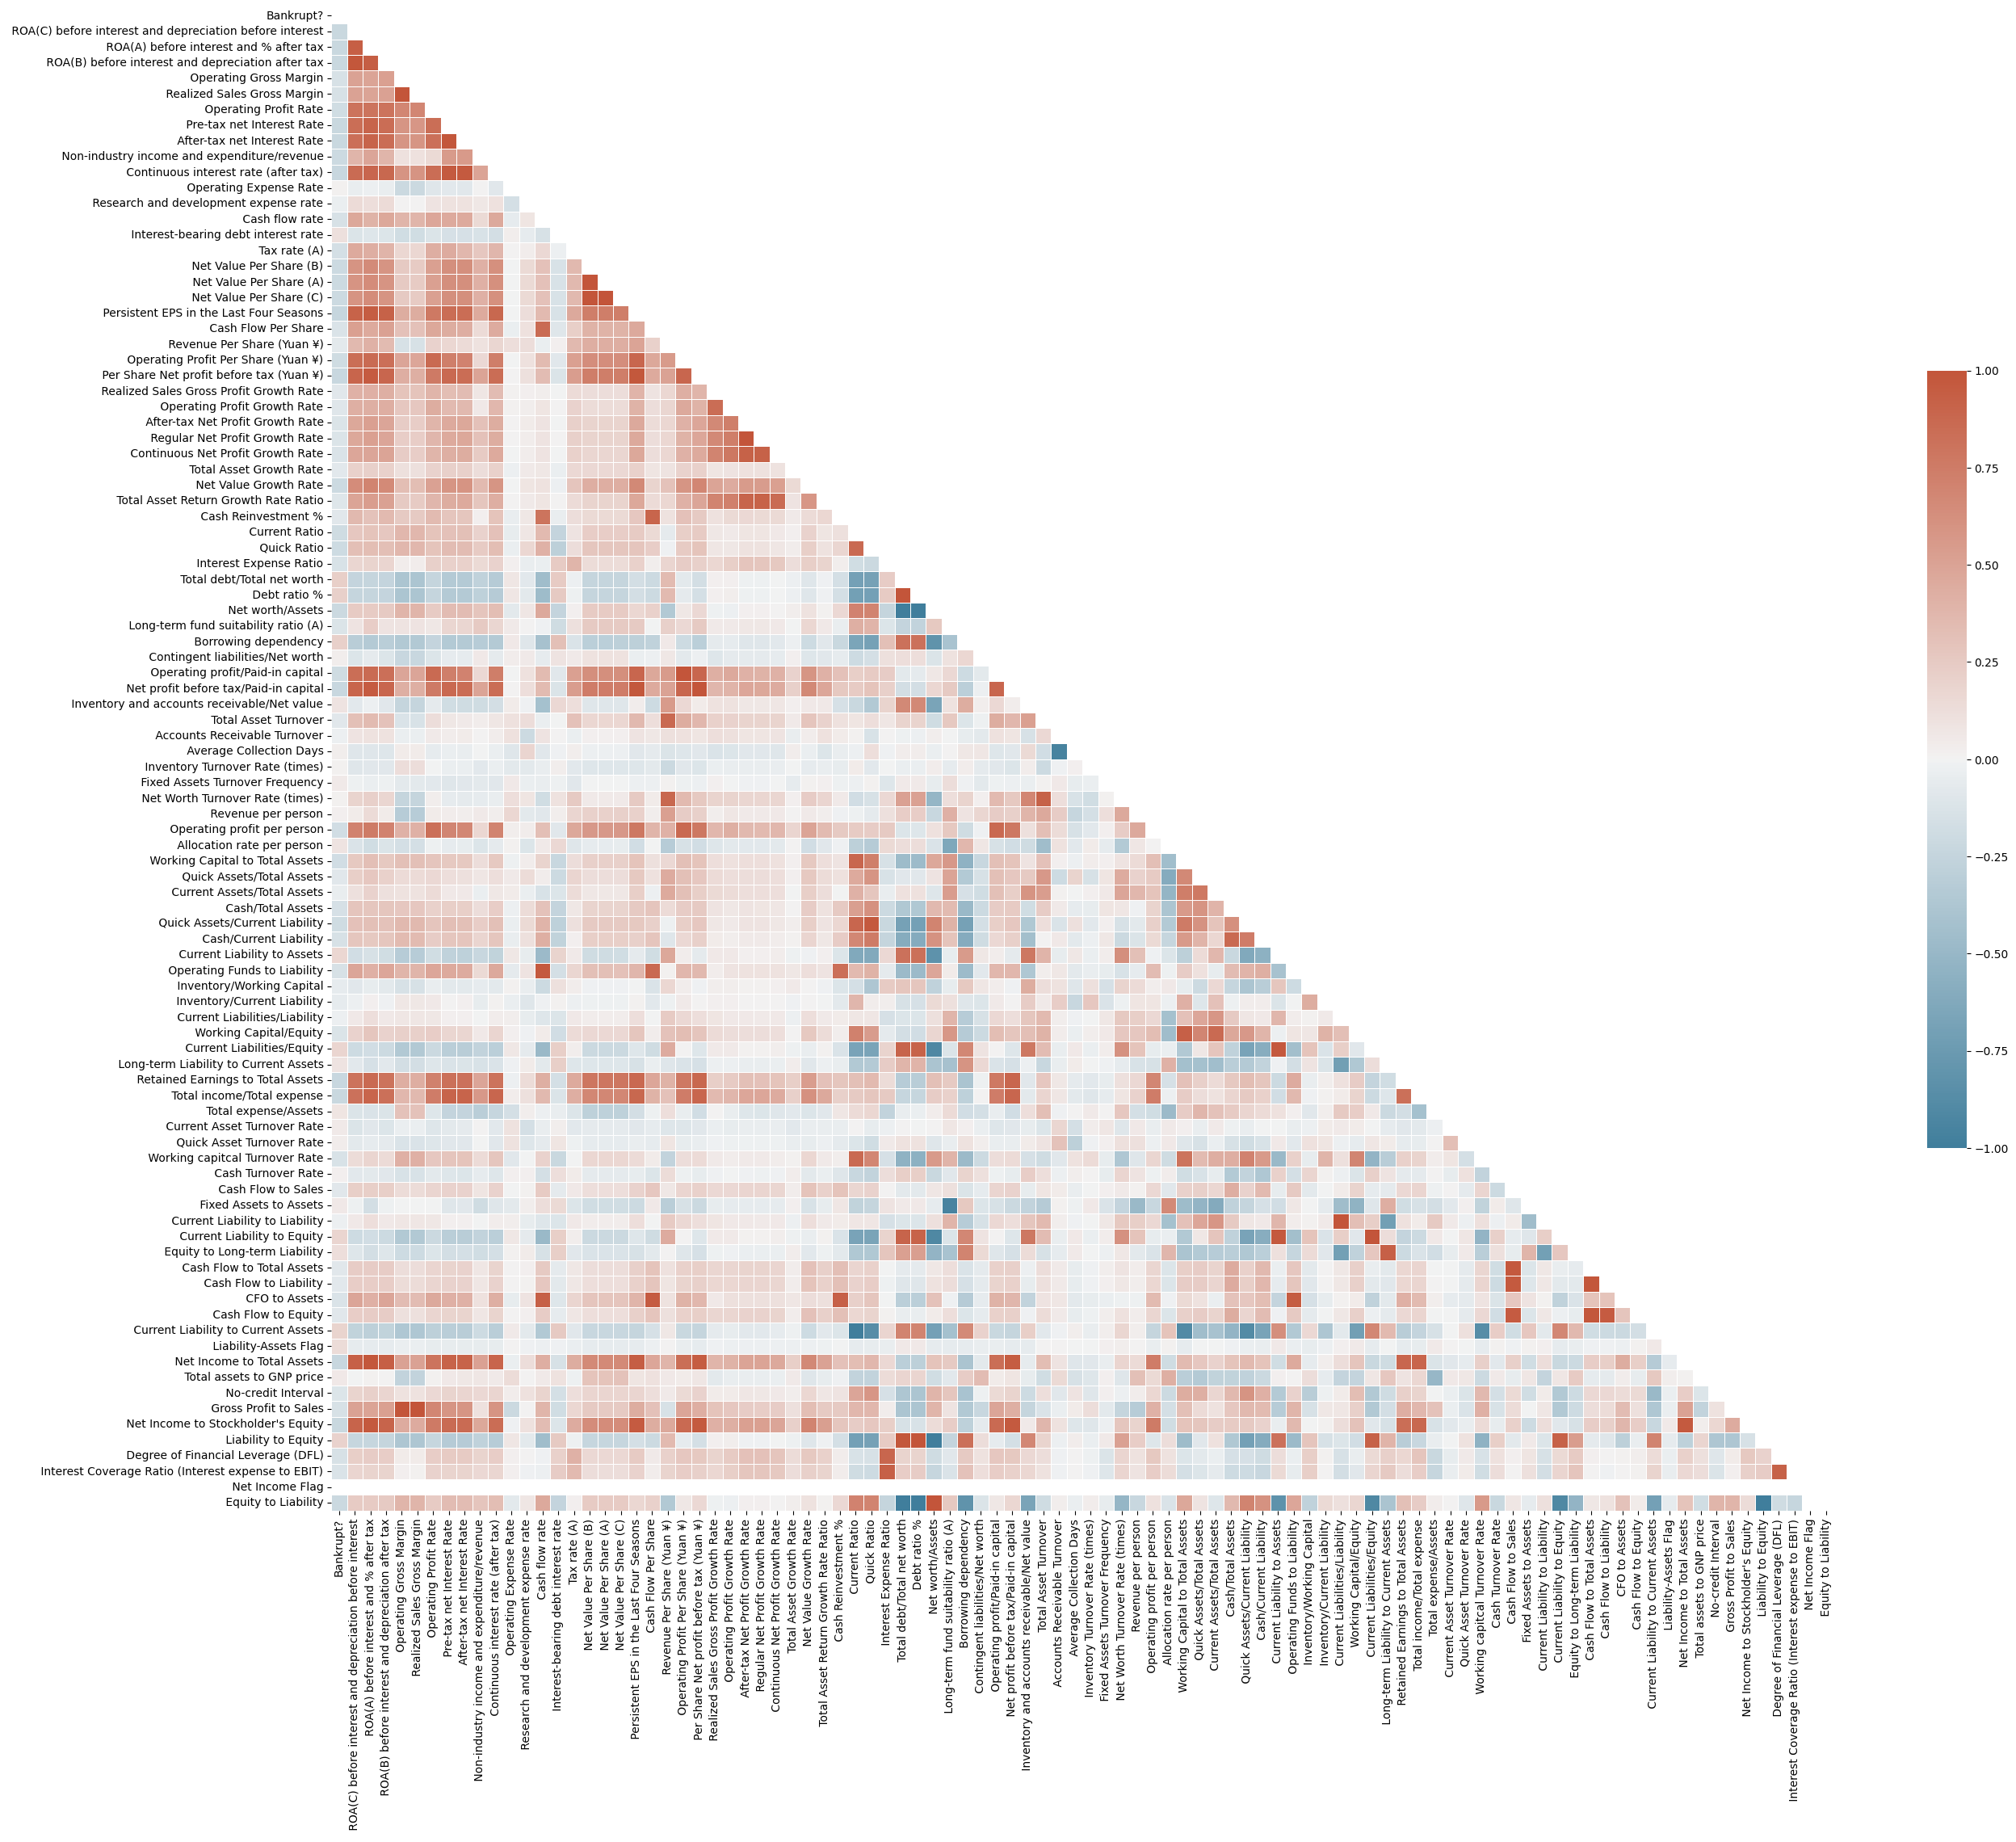

In [10]:
# Spearman Correlation Heatmap

f, ax = plt.subplots(figsize=(30, 25))
mat = tbank_data.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

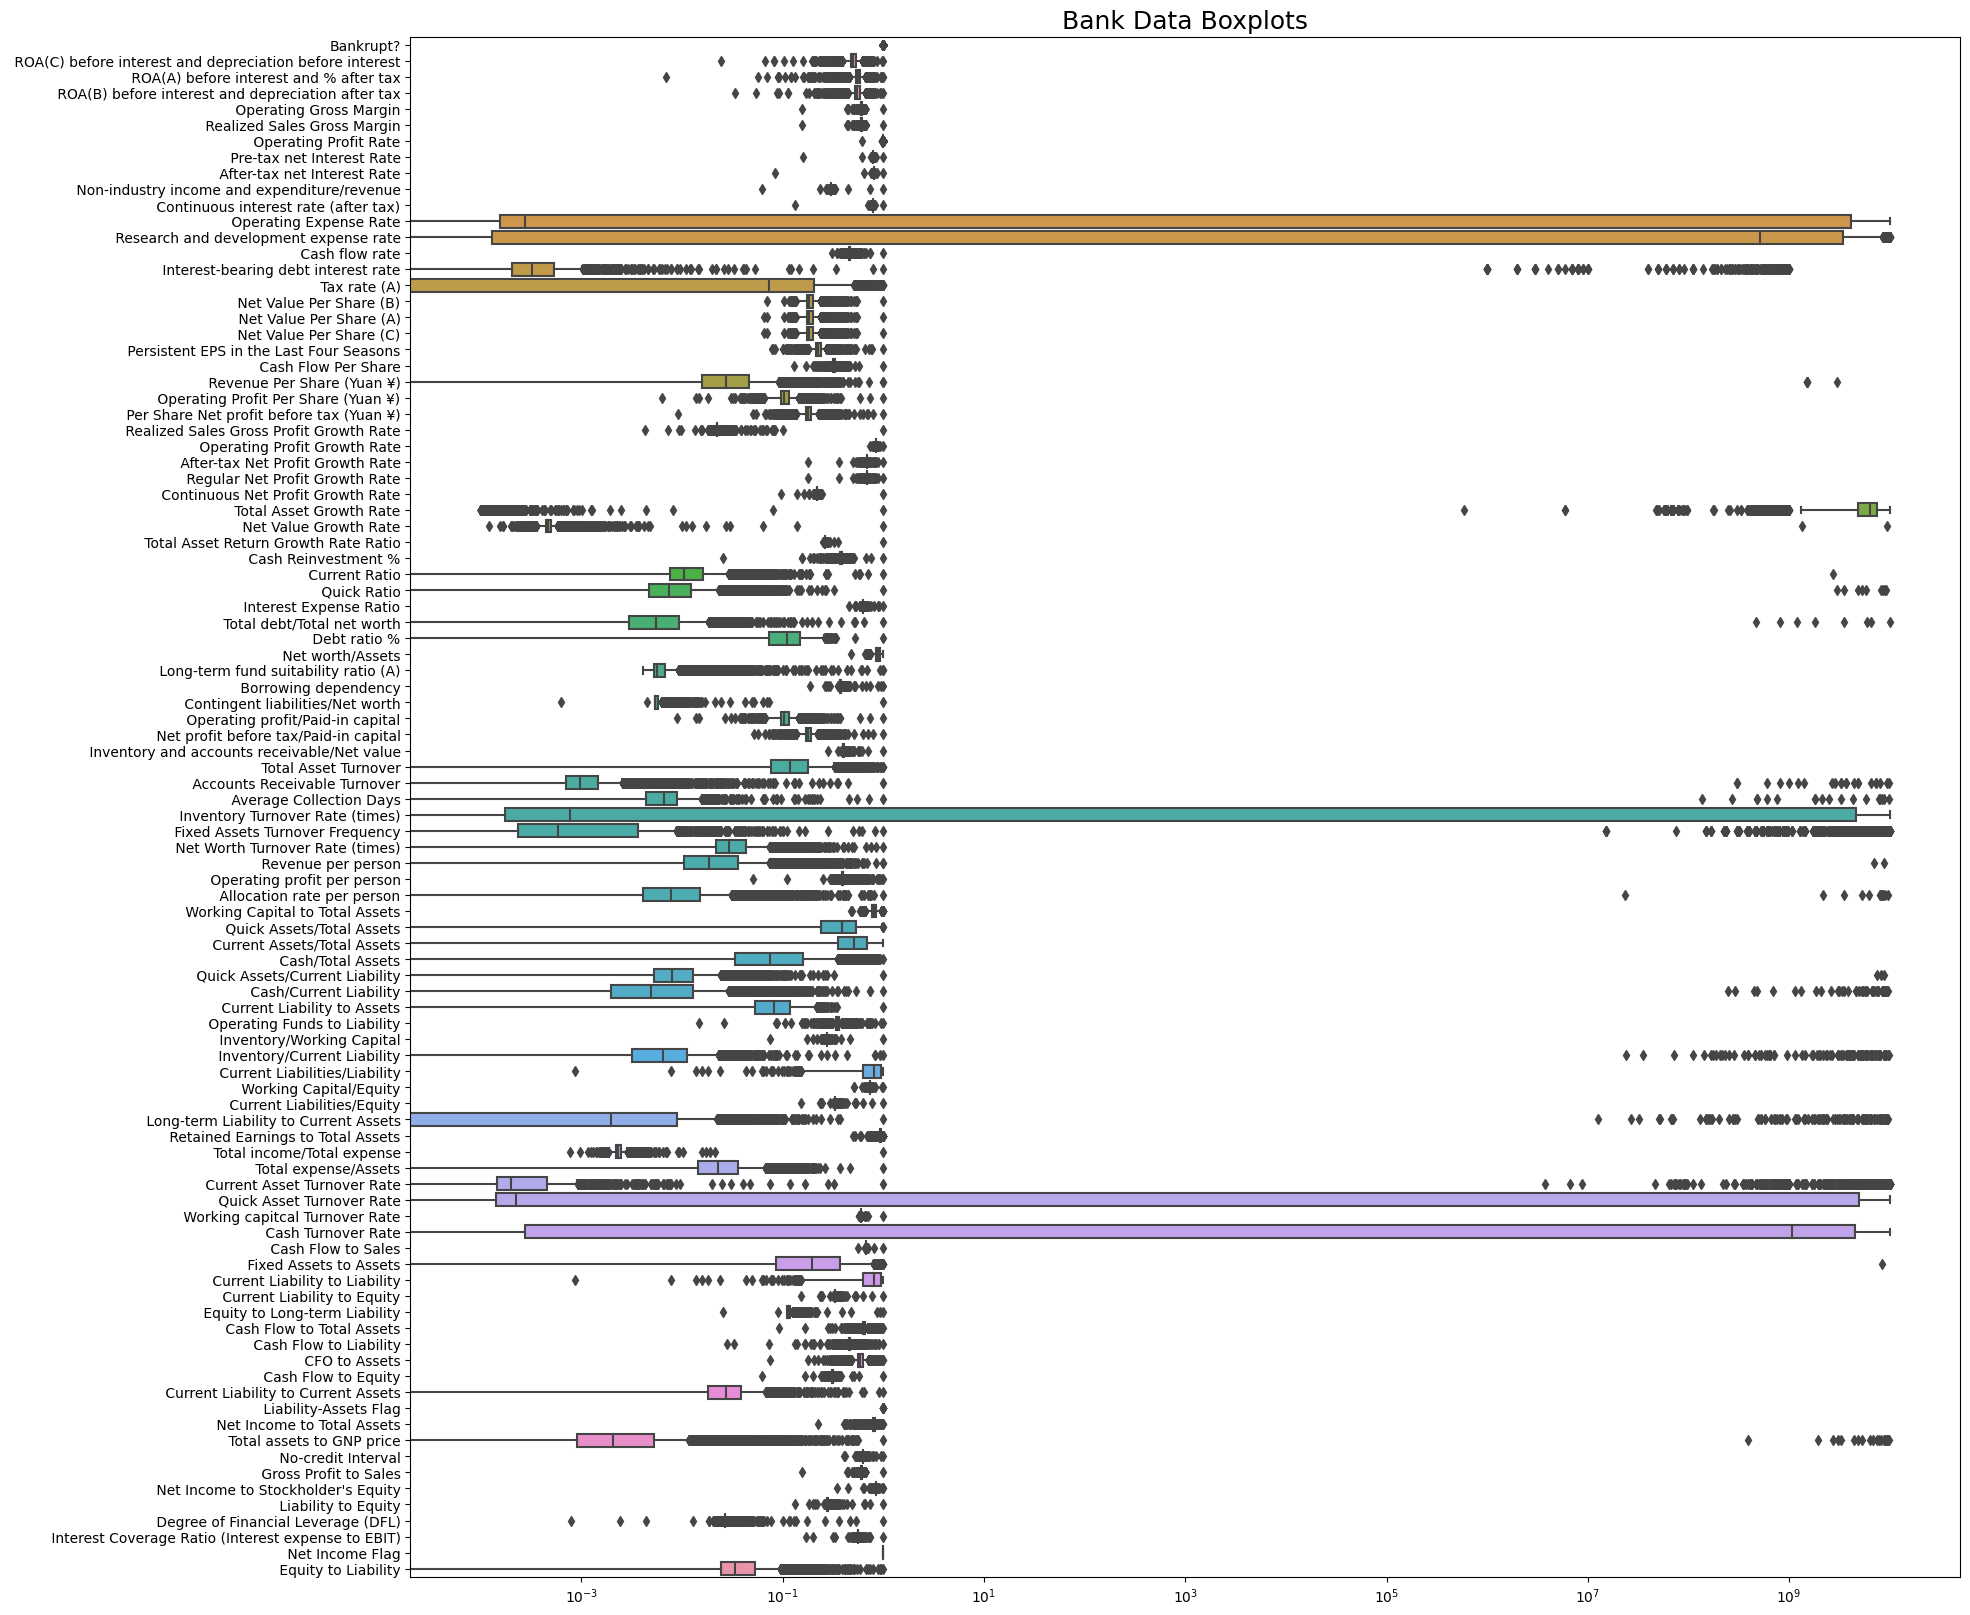

In [11]:
# Plotting Boxplots 
# reffered kaggle content

plt.figure(figsize = (20,20))
ax =sns.boxplot(data = tbank_data, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

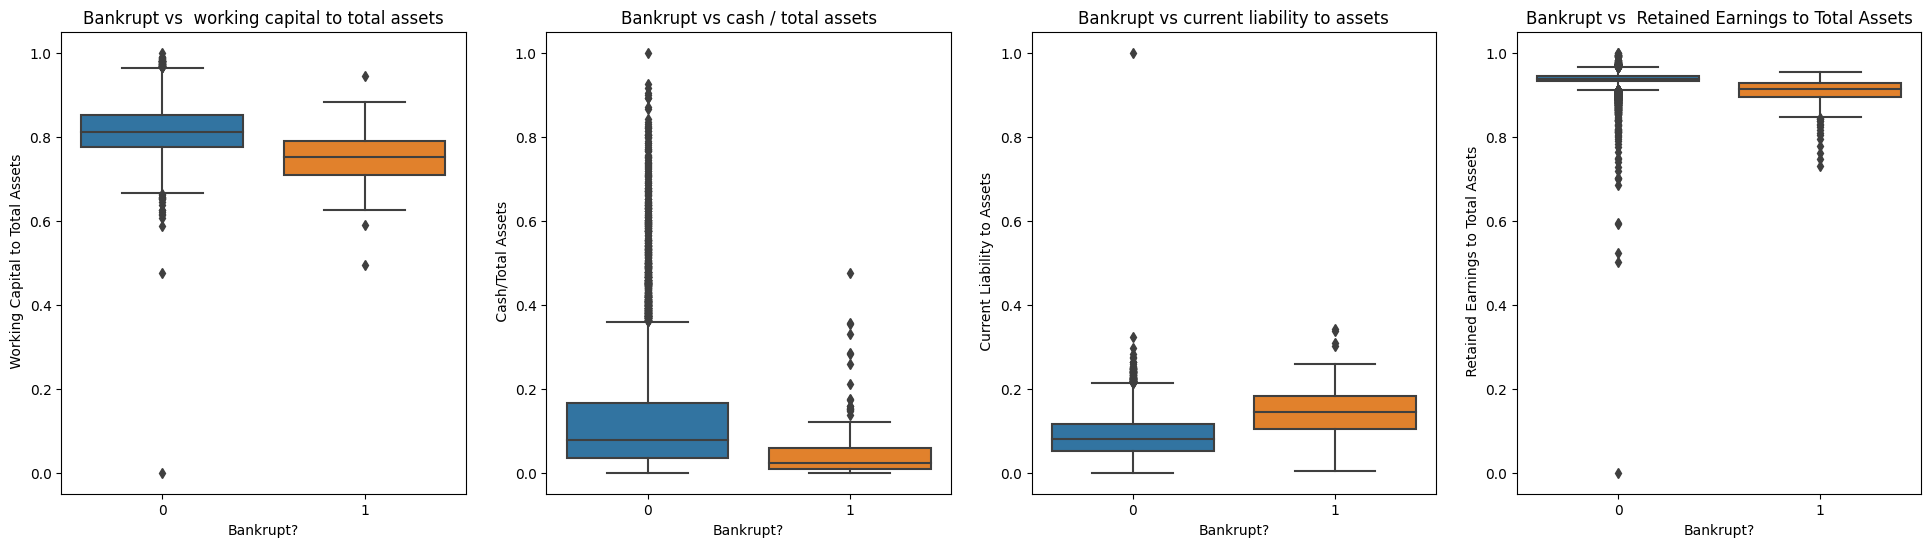

In [12]:
# Plotting other interesting features

f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='Bankrupt?', y=" Working Capital to Total Assets", data=tbank_data, ax=axes[0])
axes[0].set_title('Bankrupt vs  working capital to total assets')

sns.boxplot(x='Bankrupt?', y=" Cash/Total Assets", data=tbank_data, ax=axes[1])
axes[1].set_title('Bankrupt vs cash / total assets')


sns.boxplot(x='Bankrupt?', y=" Current Liability to Assets", data=tbank_data, ax=axes[2])
axes[2].set_title('Bankrupt vs current liability to assets')


sns.boxplot(x='Bankrupt?', y=" Retained Earnings to Total Assets", data=tbank_data, ax=axes[3])
axes[3].set_title('Bankrupt vs  Retained Earnings to Total Assets')

plt.show()

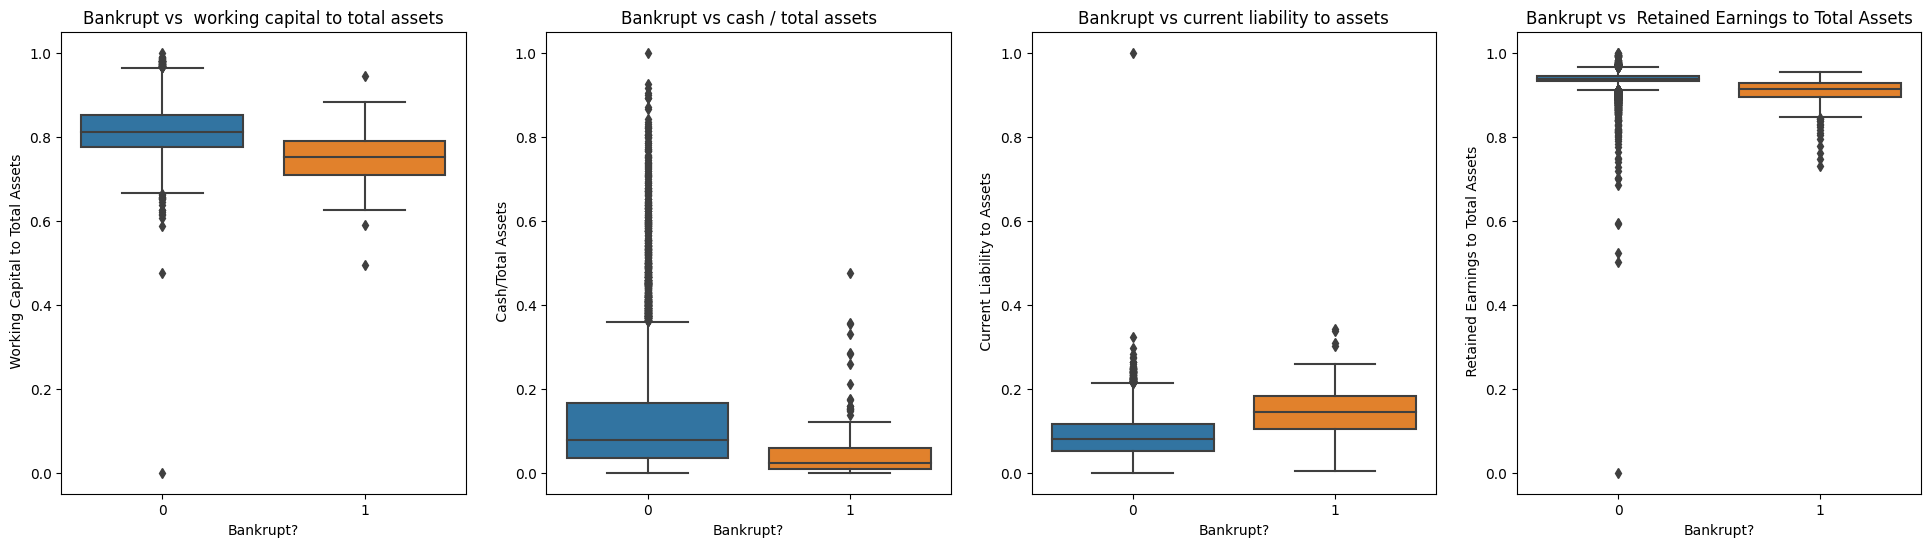

In [13]:
# Plotting other interesting features

f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='Bankrupt?', y=" Working Capital to Total Assets", data=tbank_data, ax=axes[0])
axes[0].set_title('Bankrupt vs  working capital to total assets')

sns.boxplot(x='Bankrupt?', y=" Cash/Total Assets", data=tbank_data, ax=axes[1])
axes[1].set_title('Bankrupt vs cash / total assets')


sns.boxplot(x='Bankrupt?', y=" Current Liability to Assets", data=tbank_data, ax=axes[2])
axes[2].set_title('Bankrupt vs current liability to assets')


sns.boxplot(x='Bankrupt?', y=" Retained Earnings to Total Assets", data=tbank_data, ax=axes[3])
axes[3].set_title('Bankrupt vs  Retained Earnings to Total Assets')

plt.show()

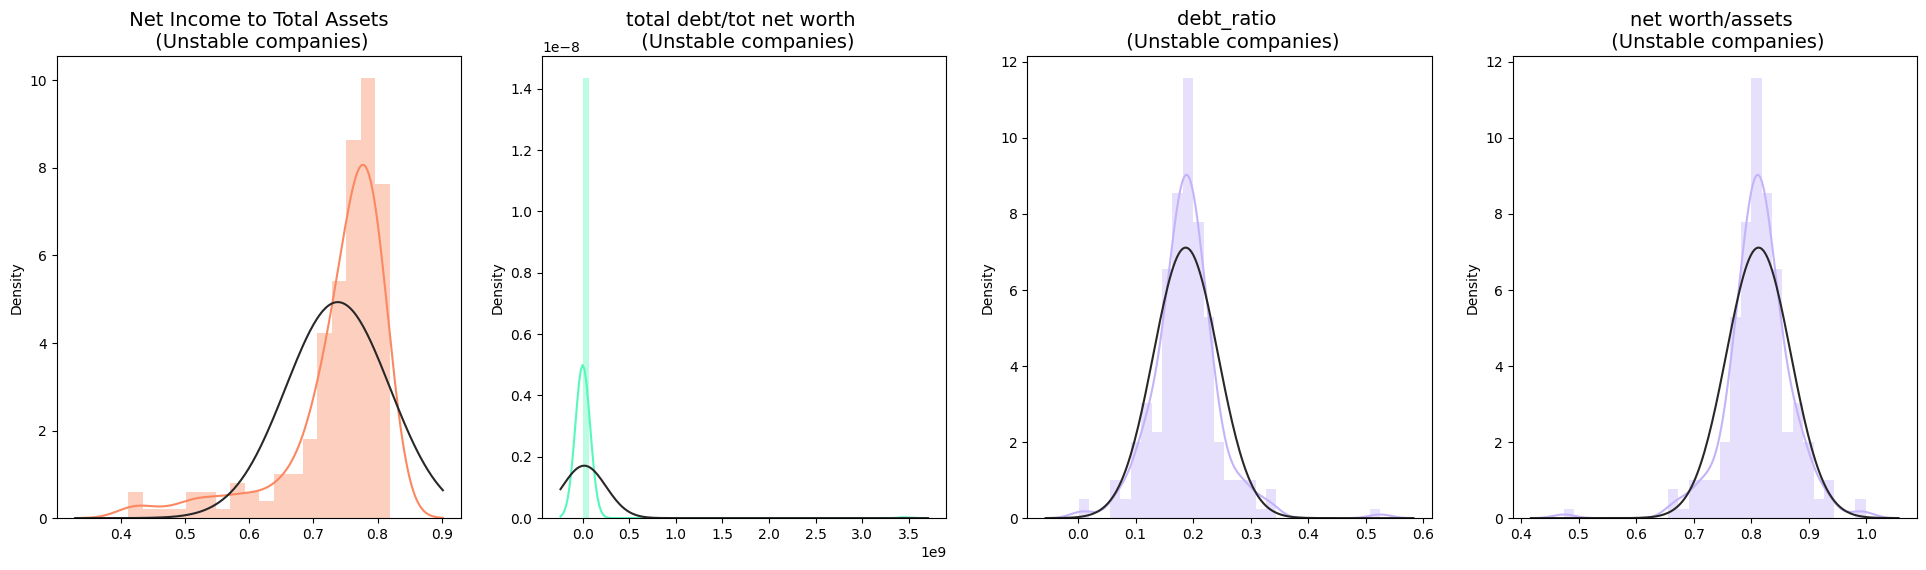

In [14]:
# Plotting the feature distributions for close to bankrputcy companies

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = tbank_data[' Net Income to Total Assets'].loc[tbank_data['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title(' Net Income to Total Assets \n (Unstable companies)', fontsize=14)

tot_debt_net = tbank_data[' Total debt/Total net worth'].loc[tbank_data['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('total debt/tot net worth \n (Unstable companies)', fontsize=14)


debt_ratio = tbank_data[' Debt ratio %'].loc[tbank_data['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('debt_ratio \n (Unstable companies)', fontsize=14)

net_worth_assets = tbank_data[' Net worth/Assets'].loc[tbank_data['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('net worth/assets \n (Unstable companies)', fontsize=14)

plt.show()

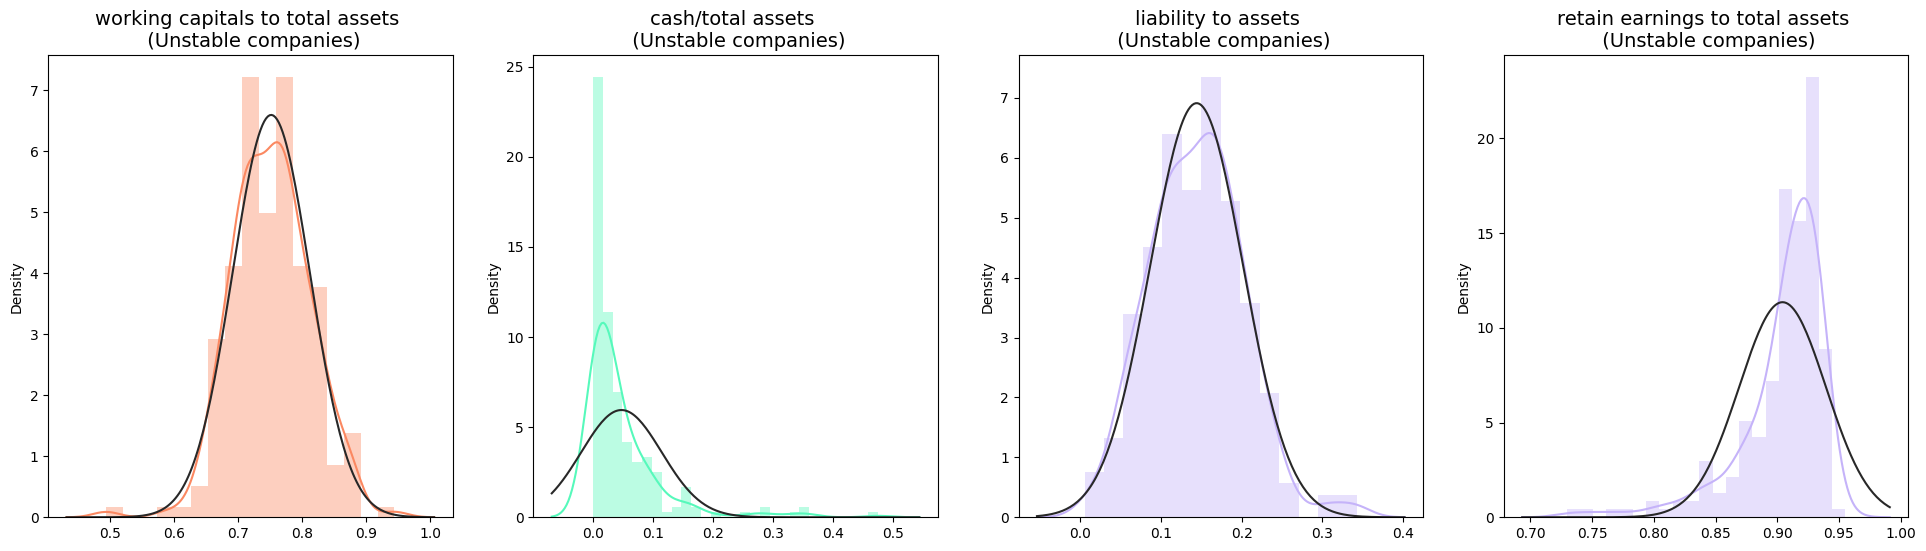

In [15]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

working_cap = tbank_data[' Working Capital to Total Assets'].loc[tbank_data['Bankrupt?'] == 1].values
sns.distplot(working_cap,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('working capitals to total assets \n (Unstable companies)', fontsize=14)

cash_tot_assets = tbank_data[' Cash/Total Assets'].loc[tbank_data['Bankrupt?'] == 1].values
sns.distplot(cash_tot_assets ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('cash/total assets \n (Unstable companies)', fontsize=14)


asset_liab = tbank_data[' Current Liability to Assets'].loc[tbank_data['Bankrupt?'] == 1].values
sns.distplot(asset_liab,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('liability to assets \n (Unstable companies)', fontsize=14)

operating_funds = tbank_data[' Retained Earnings to Total Assets'].loc[tbank_data['Bankrupt?'] == 1].values
sns.distplot(operating_funds,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('retain earnings to total assets \n (Unstable companies)', fontsize=14)

plt.show()

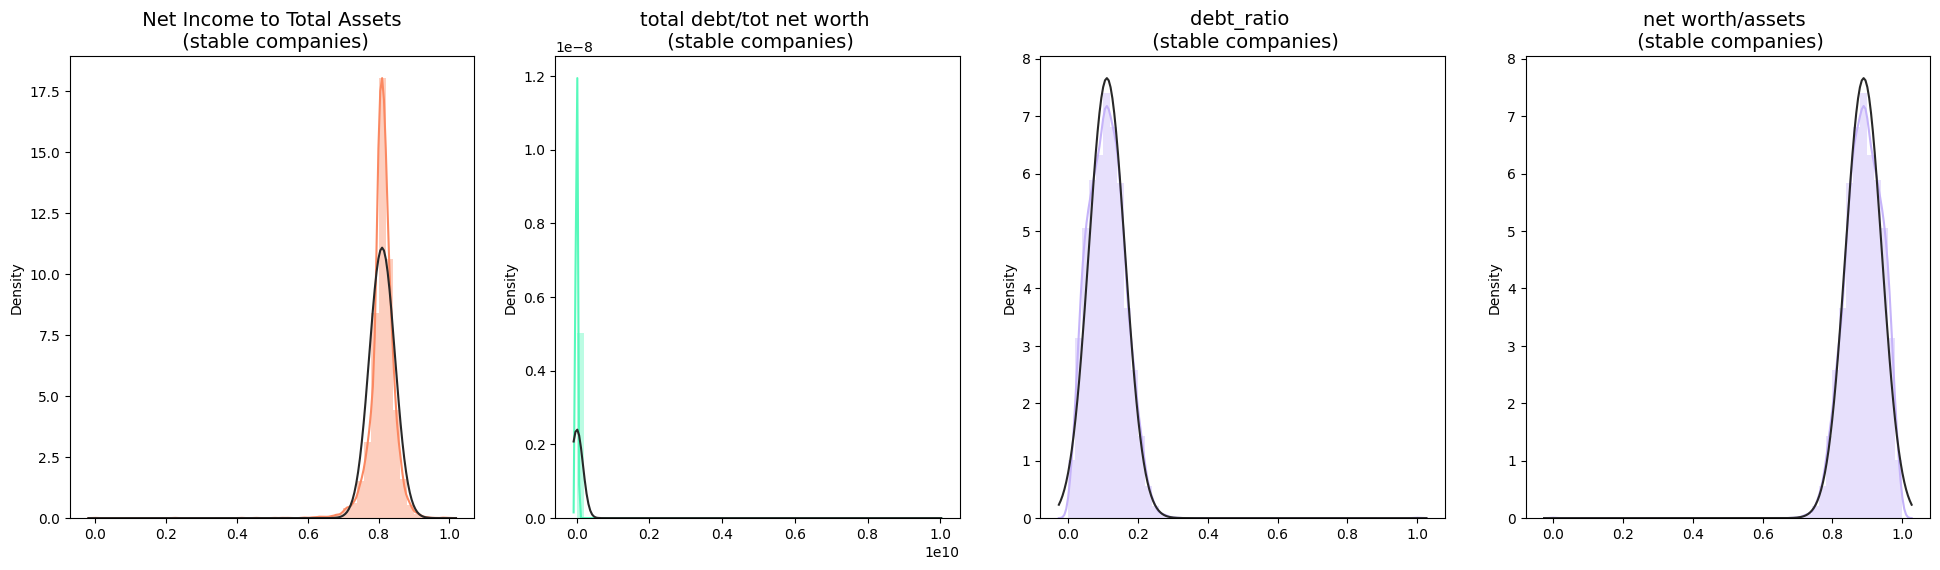

In [16]:
# Plotting the feature distributions for stable companies

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = tbank_data[' Net Income to Total Assets'].loc[tbank_data['Bankrupt?'] == 0].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title(' Net Income to Total Assets \n (stable companies)', fontsize=14)

tot_debt_net = tbank_data[' Total debt/Total net worth'].loc[tbank_data['Bankrupt?'] == 0].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('total debt/tot net worth \n (stable companies)', fontsize=14)


debt_ratio = tbank_data[' Debt ratio %'].loc[tbank_data['Bankrupt?'] == 0].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('debt_ratio \n (stable companies)', fontsize=14)

net_worth_assets = tbank_data[' Net worth/Assets'].loc[tbank_data['Bankrupt?'] == 0].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('net worth/assets \n (stable companies)', fontsize=14)

plt.show()

# Data pre-processing of Taiwanese data

In [17]:
# finding positive and negative corealition with the target varaible

positive_corr = tbank_data[numeric_features].corrwith(tbank_data["Bankrupt?"]).sort_values(ascending=False)[:6].index.tolist()
negative_corr = tbank_data[numeric_features].corrwith(tbank_data["Bankrupt?"]).sort_values()[:6].index.tolist()

positive_corr = tbank_data[positive_corr + ["Bankrupt?"]].copy()
negative_corr = tbank_data[negative_corr + ["Bankrupt?"]].copy()

print(negative_corr)

       Net Income to Total Assets   ROA(A) before interest and % after tax   
0                        0.716845                                 0.424389  \
1                        0.795297                                 0.538214   
2                        0.774670                                 0.499019   
3                        0.739555                                 0.451265   
4                        0.795016                                 0.538432   
...                           ...                                      ...   
6814                     0.799927                                 0.539468   
6815                     0.799748                                 0.538269   
6816                     0.797778                                 0.533744   
6817                     0.811808                                 0.559911   
6818                     0.815956                                 0.570105   

       ROA(B) before interest and depreciation after tax   
0  

In [18]:
# checking the columns in taiwan data
# removing net income flag --> reason


# Drop the 'Net Income Flag' column if it exists
if ' Net Income Flag' in tbank_data.columns:
    tbank_data.drop(' Net Income Flag', axis=1, inplace=True)

# Print the remaining columns
print("Remaining Columns:")
print(tbank_data.columns)

Remaining Columns:
Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
      

In [19]:
# Outliers removal 

def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return dataset

for col in tbank_data:
    tbank_df = outliers_removal(tbank_data[col],str(col),tbank_data) 

Quartile 25: 0.0 | Quartile 75: 0.0
iqr: 0.0
Cut Off: 0.0
Bankrupt? Lower: 0.0
Bankrupt? Upper: 0.0
Bankrupt? outliers for close to bankruptcy cases: 220
-----------------------------------------------------------------
Quartile 25: 0.476527080388047 | Quartile 75: 0.535562813825379
iqr: 0.05903573343733198
Cut Off: 0.08855360015599797
 ROA(C) before interest and depreciation before interest Lower: 0.38797348023204903
 ROA(C) before interest and depreciation before interest Upper: 0.624116413981377
 ROA(C) before interest and depreciation before interest outliers for close to bankruptcy cases: 391
-----------------------------------------------------------------
Quartile 25: 0.53554295682512 | Quartile 75: 0.58915721761884
iqr: 0.05361426079372
Cut Off: 0.08042139119058
 ROA(A) before interest and % after tax Lower: 0.45512156563454
 ROA(A) before interest and % after tax Upper: 0.66957860880942
 ROA(A) before interest and % after tax outliers for close to bankruptcy cases: 561
-------

Quartile 25: 0.63061225188696 | Quartile 75: 0.631125258558102
iqr: 0.0005130066711419579
Cut Off: 0.0007695100067129368
 Interest Expense Ratio Lower: 0.629842741880247
 Interest Expense Ratio Upper: 0.6318947685648149
 Interest Expense Ratio outliers for close to bankruptcy cases: 1362
-----------------------------------------------------------------
Quartile 25: 0.0030070491250148 | Quartile 75: 0.00927329266179695
iqr: 0.0062662435367821494
Cut Off: 0.009399365305173223
 Total debt/Total net worth Lower: -0.006392316180158423
 Total debt/Total net worth Upper: 0.018672657966970173
 Total debt/Total net worth outliers for close to bankruptcy cases: 407
-----------------------------------------------------------------
Quartile 25: 0.0728905281615624 | Quartile 75: 0.148804305106267
iqr: 0.0759137769447046
Cut Off: 0.1138706654170569
 Debt ratio % Lower: -0.0409801372554945
 Debt ratio % Upper: 0.2626749705233239
 Debt ratio % outliers for close to bankruptcy cases: 30
---------------

-----------------------------------------------------------------
Quartile 25: 0.0019730075415488497 | Quartile 75: 0.0128055731079178
iqr: 0.01083256556636895
Cut Off: 0.016248848349553424
 Cash/Current Liability Lower: -0.014275840808004574
 Cash/Current Liability Upper: 0.029054421457471225
 Cash/Current Liability outliers for close to bankruptcy cases: 728
-----------------------------------------------------------------
Quartile 25: 0.0533012764320206 | Quartile 75: 0.1195229934695275
iqr: 0.0662217170375069
Cut Off: 0.09933257555626035
 Current Liability to Assets Lower: -0.04603129912423975
 Current Liability to Assets Upper: 0.21885556902578784
 Current Liability to Assets outliers for close to bankruptcy cases: 95
-----------------------------------------------------------------
Quartile 25: 0.34102297735578047 | Quartile 75: 0.3609148870133705
iqr: 0.019891909657590023
Cut Off: 0.029837864486385035
 Operating Funds to Liability Lower: 0.31118511286939543
 Operating Funds to L

-----------------------------------------------------------------
Quartile 25: 0.0009036204813306 | Quartile 75: 0.0052697768568805
iqr: 0.0043661563755499
Cut Off: 0.00654923456332485
 Total assets to GNP price Lower: -0.005645614081994249
 Total assets to GNP price Upper: 0.01181901142020535
 Total assets to GNP price outliers for close to bankruptcy cases: 797
-----------------------------------------------------------------
Quartile 25: 0.623636304973909 | Quartile 75: 0.6241681927893561
iqr: 0.0005318878154471074
Cut Off: 0.0007978317231706611
 No-credit Interval Lower: 0.6228384732507384
 No-credit Interval Upper: 0.6249660245125268
 No-credit Interval outliers for close to bankruptcy cases: 1139
-----------------------------------------------------------------
Quartile 25: 0.6004428952063054 | Quartile 75: 0.613913271038147
iqr: 0.013470375831841519
Cut Off: 0.02020556374776228
 Gross Profit to Sales Lower: 0.5802373314585432
 Gross Profit to Sales Upper: 0.6341188347859092
 Gro

In [20]:
# standardiseing features

numeric_features = tbank_df.dtypes[tbank_data.dtypes != 'int64'].index
tbank_data[numeric_features] = tbank_df[numeric_features].apply(lambda x: (x - x.mean()) / (x.std()))

tbank_df[numeric_features] = tbank_df[numeric_features].fillna(0)

In [21]:
tbank_df.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest   
count  6270.000000                                        6270.000000         \
mean      0.034769                                           0.505080          
std       0.183208                                           0.059819          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476966          
50%       0.000000                                           0.502754          
75%       0.000000                                           0.534637          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax   
count                              6270.000000  \
mean                                  0.558403   
std                                   0.064196   
min                                   0.000000   
25%                                   0.536143   
50%                                   0.559693   
75%                                   0.588121   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax   
count                                        6270.000000   \
mean                                            0.553447    
std                                             0.060618    
min                                             0.000000    
25%                                             0.527772    
50%                                             0.552278    
75%                                             0.582941    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin   
count              6270.000000                   6270.000000  \
mean                  0.607232                      0.607211   
std                   0.013592                      0.013571   
min                   0.432653                      0.432653   
25%                   0.600225                      0.600212   
50%                   0.605525                      0.605511   
75%                   0.612858                      0.612792   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate   
count             6270.000000                 6270.000000  \
mean                 0.998754                    0.797187   
std                  0.013558                    0.013402   
min                  0.000000                    0.000000   
25%                  0.998971                    0.797387   
50%                  0.999021                    0.797460   
75%                  0.999088                    0.797568   
max                  0.999778                    1.000000   

        After-tax net Interest Rate   
count                   6270.000000  \
mean                       0.809079   
std                        0.014170   
min                        0.000000   
25%                        0.809312   
50%                        0.809373   
75%                        0.809460   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...   
count                                   6270.000000  ...  \
mean                                       0.303621  ...   
std                                        0.011635  ...   
min                                        0.000000  ...   
25%                                        0.303465  ...   
50%                                        0.303523  ...   
75%                                        0.303580  ...   
max                                        1.000000  ...   

        Liability-Assets Flag   Net Income to Total Assets   
count             6270.000000                  6270.000000  \
mean                 0.001276                     0.807503   
std                  0.035700                     0.039779   
min                

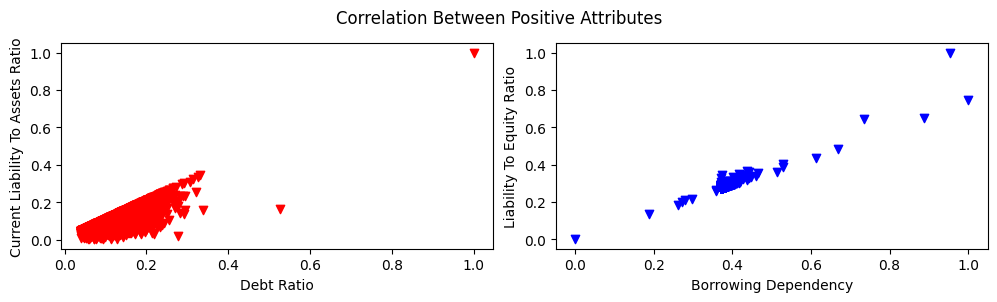

In [22]:
# plotting correlation between positive attributes 

plt.figure(figsize=(10,3))

plt.suptitle("Correlation Between Positive Attributes")

plt.subplot(1,2,1)
plt.xlabel("Debt Ratio")
plt.ylabel("Current Liability To Assets Ratio")
plt.scatter(tbank_df[" Debt ratio %"],tbank_df[" Current Liability to Assets"], marker='v',color = 'red')

plt.subplot(1,2,2)
plt.xlabel("Borrowing Dependency")
plt.ylabel("Liability To Equity Ratio")
plt.scatter(tbank_df[" Borrowing dependency"],tbank_df[" Liability to Equity"], marker='v',color = 'blue')

plt.tight_layout(pad=0.8)


A strong correlation exists between attributes that are positively related to the target attribute.

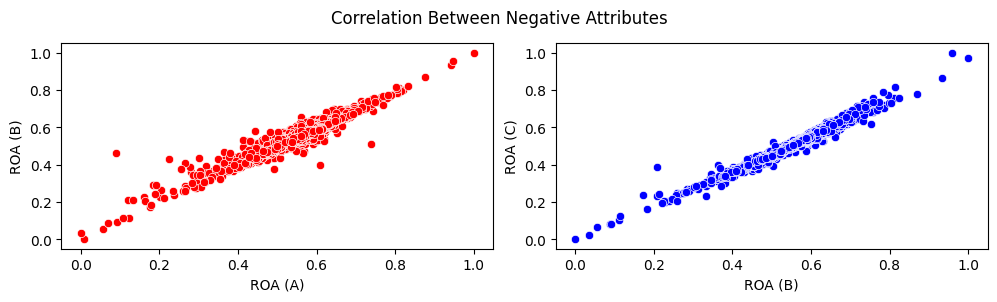

In [23]:
# plotting correlation between negative attributes 

plt.figure(figsize=(10,3))

plt.suptitle("Correlation Between Negative Attributes")

plt.subplot(1,2,1)
plt.xlabel("ROA (A)")
plt.ylabel("ROA (B)")
sns.scatterplot(data=tbank_df, x=' ROA(A) before interest and % after tax', y=' ROA(B) before interest and depreciation after tax',color = 'red')

plt.subplot(1,2,2)
plt.xlabel("ROA (B)")
plt.ylabel("ROA (C)")
sns.scatterplot(data=tbank_df, x=' ROA(B) before interest and depreciation after tax', y=' ROA(C) before interest and depreciation before interest',color = 'blue')

plt.tight_layout(pad=0.8)

Attributes with a low correlation to the target attribute exhibit a positive relationship.

# Summary

- Between 1999 and 2000, only a few organizations went bankrupt.
- Companies with many assets are generally seen in a positive light.
- However, having many assets doesn't prevent bankruptcy.
- Many organizations have reported negative net income over the past two years.
- Only a small fraction of these organizations with negative income have gone bankrupt.
- Attributes like “Debt Ratio %, Current Liability To Assets, and Current Liability To Current Assets" have a strong correlation with the target attribute.
- A rise in these attribute values can lead to significant losses and potential bankruptcy.
- Attributes negatively correlated with the target attribute can help organizations avoid bankruptcy.
- There's a noticeable relationship between attributes with both high and low correlations to the target attribute.
- Among the top 12 attributes, “Net Worth/Assets and Debt Ratio %" are inversely related.

# Resampling of the dataset and Machine learning model implementations

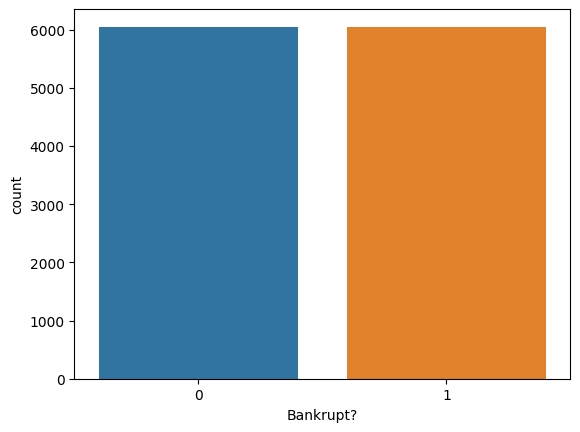

In [24]:
# Separate features and target variable
X = tbank_df.drop(labels=['Bankrupt?'], axis=1)
y = tbank_df['Bankrupt?']

# Perform SMOTE oversampling
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X, y)

# Visualize the balanced class distribution
sns.countplot(x=y_resampled)

# drop national income 

# Create a DataFrame from the oversampled data
oversampled_data = pd.concat([pd.DataFrame(y_resampled, columns=['Bankrupt?']), pd.DataFrame(X_resampled, columns=X.columns)], axis=1)

# Save the oversampled data to a CSV file in the varaible ts_data
ts_data = oversampled_data.to_csv('taiwan_resampled_data.csv', index=False)

The numeric attributes have been normalized.



# Machine learning model implemenations without Feature engineeirng

In [25]:
# The classes are heavily skewed we need to solve this issue later.
# count of bankrupt and non-bankrupt companies
ts_data = pd.read_csv('taiwan_resampled_data.csv')
print(ts_data['Bankrupt?'].value_counts())
print('-'* 30)
print('Non-Bankrupt: ', round(ts_data['Bankrupt?'].value_counts()[0]/len(ts_data) * 100,2), '% of the Taiwan resampled dataset')
print('Bankrupt: ', round(ts_data['Bankrupt?'].value_counts()[1]/len(ts_data) * 100,2), '% of the Taiwan resampled dataset')

Bankrupt?
1    6052
0    6052
Name: count, dtype: int64
------------------------------
Non-Bankrupt:  50.0 % of the Taiwan resampled dataset
Bankrupt:  50.0 % of the Taiwan resampled dataset


Logistic Regression ROC-AUC: 0.97
Decision Tree ROC-AUC: 0.96
SVM ROC-AUC: 0.99
KNN ROC-AUC: 0.98
Random Forest ROC-AUC: 1.00
XGBoost ROC-AUC: 1.00


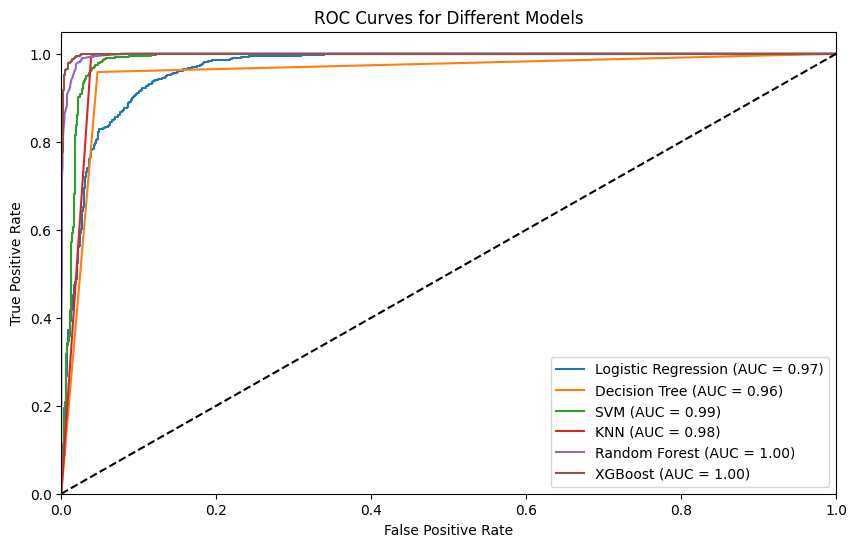

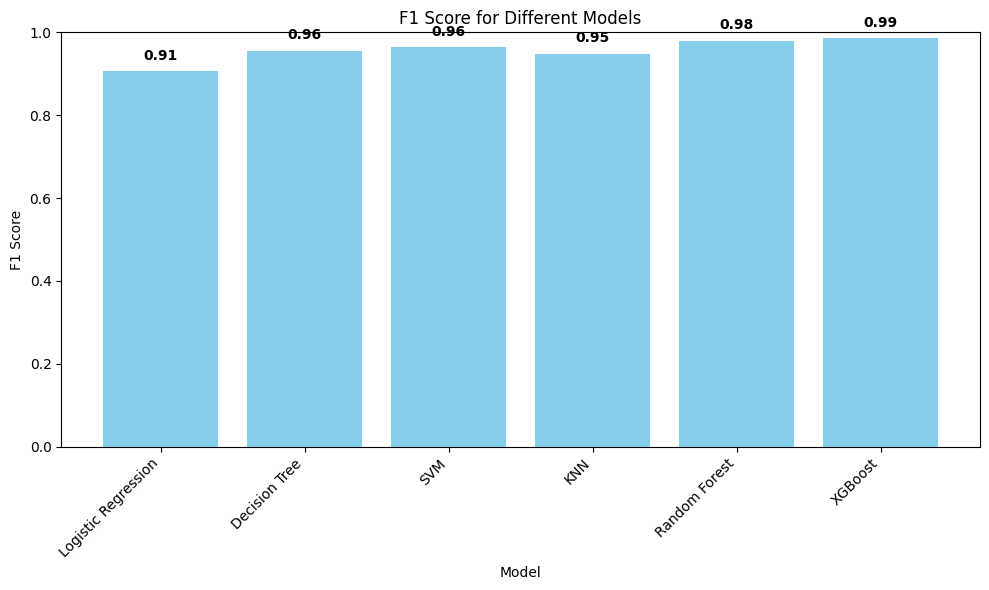

In [27]:
# without hyper parameter tuning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, f1_score
import matplotlib.pyplot as plt
import pandas as pd

# Load your Taiwan bankruptcy dataset 
data = pd.read_csv('taiwan_resampled_data.csv')

# Data preprocessing
# Handle missing values and encode categorical features if needed

X = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),  
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

roc_auc_scores = {}
f1_scores = {}

plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores[name] = roc_auc
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")

# Print ROC-AUC scores
for model_name, roc_auc in roc_auc_scores.items():
    print(f'{model_name} ROC-AUC: {roc_auc:.2f}')

# Evaluating models
for model_name in models.keys():
    y_pred = models[model_name].predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores[model_name] = f1

# Bar plot for F1 scores
plt.figure(figsize=(10, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score for Different Models')
plt.ylim(0, 1)  # Set the y-axis range (0 to 1)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability

# graph
for model_name, f1 in f1_scores.items():
    plt.text(model_name, f1 + 0.02, f"{f1:.2f}", ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


Logistic Regression ROC-AUC: 0.97
Decision Tree ROC-AUC: 0.96
SVM ROC-AUC: 0.99
KNN ROC-AUC: 0.98
Random Forest ROC-AUC: 1.00
XGBoost ROC-AUC: 1.00


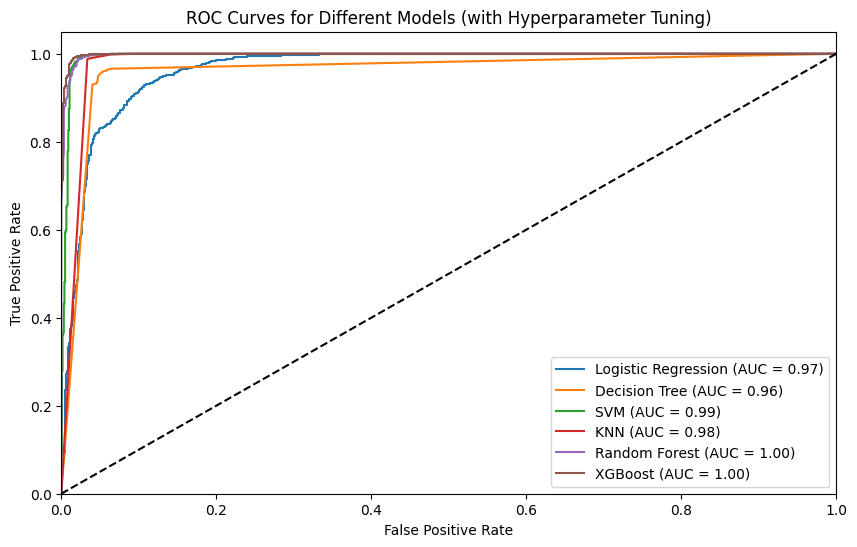

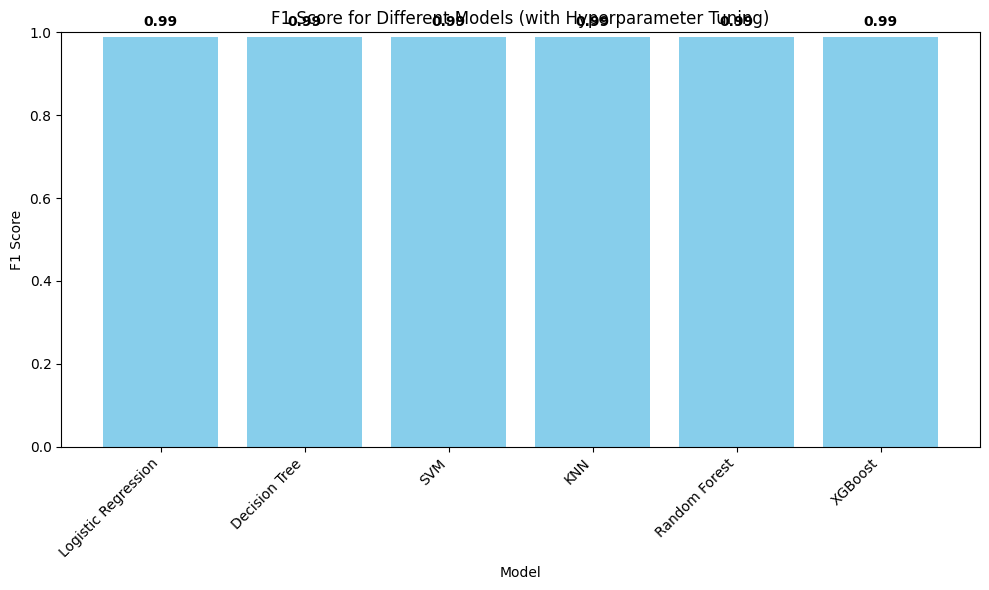

In [28]:
# models with hyperparameter tuning


# Load your Taiwan bankruptcy dataset (replace 'data.csv' with your file)
data = pd.read_csv('taiwan_resampled_data.csv')

# Data preprocessing
# Handle missing values and encode categorical features if needed
# Separate features (X) and target variable (y)
X = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (not required for all models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the models with hyperparameter tuning using GridSearchCV
models = {
    'Logistic Regression': (LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1, 10]}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}),
    'SVM': (SVC(probability=True), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    'XGBoost': (XGBClassifier(), {'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}),
}

roc_auc_scores = {}
f1_scores = {}

plt.figure(figsize=(10, 6))

for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Probability of positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores[name] = roc_auc
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models (with Hyperparameter Tuning)')
plt.legend(loc="lower right")

# Print ROC-AUC scores
for model_name, roc_auc in roc_auc_scores.items():
    print(f'{model_name} ROC-AUC: {roc_auc:.2f}')

# Evaluate and compare the models
for model_name, (model, _) in models.items():
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores[model_name] = f1

# Bar plot for F1 scores
plt.figure(figsize=(10, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score for Different Models (with Hyperparameter Tuning)')
plt.ylim(0, 1)  # Set the y-axis range (0 to 1)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability

# Add labels to the bars
for model_name, f1 in f1_scores.items():
    plt.text(model_name, f1 + 0.02, f"{f1:.2f}", ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


# Plotting important Features using PCA

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
import plotly.express as px

def preprocess_inputs(df):
    # Remove leading/trailing spaces from column names
    df.columns = df.columns.str.strip()
    
    # Split data into features and target
    X = df.drop('Bankrupt?', axis=1)
    Y = df['Bankrupt?']
    
    # Split data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale the features
    scaler = StandardScaler().fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = preprocess_inputs(data)


In [30]:

n_components = 50

pca = PCA(n_components=n_components)
pca.fit(X_train)

X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])

In [31]:
fig = px.bar(
    x=["PC" + str(i) for i in range(1, n_components + 1)],
    y=pca.explained_variance_ratio_,
    labels={'x': "Principal Component", 'y': "Variance Ratio"},
    color=pca.explained_variance_ratio_,
    color_continuous_scale=[(0, 'lightblue'), (1, 'darkblue')],
    title="Proportion of Variance in Principal Components"
)

fig.show()

# Machine learning model implemenations in Spark

In [33]:
# without feature engineeirng
from pyspark.ml.feature import StandardScaler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession

# Spark session
spark = SparkSession.builder.appName("ML_withoutf").getOrCreate()

# Load the CSV data into a Spark DataFrame
df = spark.read.csv("taiwan_resampled_data.csv", header=True, inferSchema=True)

# Selecting the features 
feature_cols = [col_name for col_name in df.columns if col_name != 'Bankrupt?']
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_assembled = assembler.transform(df)

# StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=False)

# Fit and transform 
scaler_model = scaler.fit(df_assembled)
scaled_data = scaler_model.transform(df_assembled)

train_data, test_data = scaled_data.randomSplit([0.8, 0.2], seed=42)

# Corrected the keyword argument here
dt_classifier = DecisionTreeClassifier(featuresCol="scaled_features", labelCol="Bankrupt?", maxDepth=5)
dt_model = dt_classifier.fit(train_data)

# Make predictions 
predictions = dt_model.transform(test_data)

# Evaluations
evaluator = MulticlassClassificationEvaluator(labelCol="Bankrupt?", predictionCol="prediction", metricName="f1")
dt_f1_score = evaluator.evaluate(predictions)
print(f"F1 Score of Decision Tree: {dt_f1_score}")  # Corrected the variable name here



F1 Score of Decision Tree: 0.9073751292808911


In [34]:
# 2. logistic regression
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol='scaled_features', labelCol='Bankrupt?')
lr_model = lr.fit(train_data)
lr_predictions = lr_model.transform(test_data)
evaluator = MulticlassClassificationEvaluator(labelCol="Bankrupt?", predictionCol="prediction", metricName="f1")
lr_f1_score = evaluator.evaluate(lr_predictions)

print("Logistic Regression F1 Score:", lr_f1_score)

Logistic Regression F1 Score: 0.9031738765458116


In [35]:
# 3. SVM

from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Create an instance of the LinearSVC model
svm = LinearSVC(featuresCol='scaled_features', labelCol='Bankrupt?', maxIter=100)

# Fit the SVM model to the training data
svm_model = svm.fit(train_data)

# Make predictions on the test data
svm_predictions = svm_model.transform(test_data)

# Evaluate the SVM model
evaluator = MulticlassClassificationEvaluator(labelCol="Bankrupt?", predictionCol="prediction", metricName="f1")
svm_f1_score = evaluator.evaluate(svm_predictions)

print("SVM F1 Score:", svm_f1_score)

SVM F1 Score: 0.9095304100040118


In [36]:
# 4. xg boost
from pyspark.ml.classification import LinearSVC, GBTClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

xgboost = GBTClassifier(featuresCol='scaled_features', labelCol='Bankrupt?', maxDepth=5, maxIter=50)

# Fit the XGBoost model to the training data
xgboost_model = xgboost.fit(train_data)

# Make predictions on the test data using XGBoost
xgboost_predictions = xgboost_model.transform(test_data)

# Evaluate the XGBoost model
xgboost_f1_score = evaluator.evaluate(xgboost_predictions)

print("XGBoost F1 Score:", xgboost_f1_score)

spark.stop()

XGBoost F1 Score: 0.9590364886714995


In [37]:
#5.
from pyspark.ml.classification import RandomForestClassifier
from pyspark.sql import SparkSession
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize a Spark session
spark = SparkSession.builder.appName("RandomForestExample_withoutf").getOrCreate()

# Load the CSV data into a Spark DataFrame
df = spark.read.csv("taiwan_resampled_data.csv", header=True, inferSchema=True)

# Selecting the features for scaling (excluding the label column)
feature_cols = [col_name for col_name in df.columns if col_name != 'Bankrupt?']
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_assembled = assembler.transform(df)

# StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=False)

# Fit and transform 
scaler_model = scaler.fit(df_assembled)
scaled_data = scaler_model.transform(df_assembled)


train_data, test_data = scaled_data.randomSplit([0.8, 0.2], seed=42)

# Creating an instance of the RandomForestClassifier model
rf = RandomForestClassifier(featuresCol='scaled_features', labelCol='Bankrupt?', numTrees=100, maxDepth=5)

# Fitting the Random Forest model to the training data
rf_model = rf.fit(train_data)

# Making predictions on the test data using Random Forest
rf_predictions = rf_model.transform(test_data)

# Evaluating the Random Forest model using F1 score
evaluator = MulticlassClassificationEvaluator(labelCol="Bankrupt?", predictionCol="prediction", metricName="f1")
rf_f1_score = evaluator.evaluate(rf_predictions)

print("Random Forest F1 Score:", rf_f1_score)

# Stop
spark.stop()


Random Forest F1 Score: 0.915967557900867


# Plotting graph without feature engg.

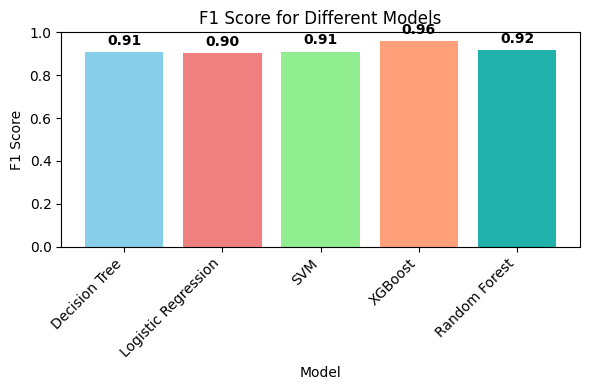

In [38]:
# F1 scores for different models
model_names = ["Decision Tree", "Logistic Regression", "SVM", "XGBoost", "Random Forest"]
f1_scores = [dt_f1_score, lr_f1_score, svm_f1_score, xgboost_f1_score, rf_f1_score]

colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen']

# Creating a bar plot for F1 scores
plt.figure(figsize=(6, 4)) 
plt.bar(model_names, f1_scores, color=colors)
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score for Different Models')
plt.ylim(0, 1)  # Set the y-axis range (0 to 1)
plt.xticks(rotation=45, ha="right") 

# Adding labels to the bars
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

    
plt.tight_layout()
plt.show()



In [39]:
# with feature eengiineering
from pyspark.sql import SparkSession
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import PCA
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.sql.functions import col
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize a Spark session
spark = SparkSession.builder.appName("ml_withf").getOrCreate()

# Load the CSV data into a Spark DataFrame
df = spark.read.csv("taiwan_resampled_data.csv", header=True, inferSchema=True)

# Select the features for scaling (excluding the label column)
feature_cols = [col_name for col_name in df.columns if col_name != 'Bankrupt?']
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_assembled = assembler.transform(df)

# Initialize the StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=False)

# Fit and transform the scaler
scaler_model = scaler.fit(df_assembled)
scaled_data = scaler_model.transform(df_assembled)

# Apply PCA
num_pca_components = 85
pca = PCA(k=num_pca_components, inputCol="scaled_features", outputCol="pca_features")
pca_model = pca.fit(scaled_data)
X_pca = pca_model.transform(scaled_data).select("pca_features", "Bankrupt?")

# Split the data into training and testing sets
train_data, test_data = X_pca.randomSplit([0.8, 0.2], seed=42)

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(featuresCol="pca_features", labelCol="Bankrupt?", maxDepth=5)

# Fit the model
dt_model = dt_classifier.fit(train_data)

# Make predictions on the test data
predictions = dt_model.transform(test_data)

# Evaluate the model using F1 score
evaluator = MulticlassClassificationEvaluator(labelCol="Bankrupt?", predictionCol="prediction", metricName="f1")
dtf_f1_score = evaluator.evaluate(predictions)
print(f"F1 Score of Decision tree: {dtf_f1_score}")

F1 Score of Decision tree: 0.8937911355147699


In [40]:
# 2. logistic regression
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol='pca_features', labelCol='Bankrupt?')
lr_model = lr.fit(train_data)
lr_predictions = lr_model.transform(test_data)
evaluator = MulticlassClassificationEvaluator(labelCol="Bankrupt?", predictionCol="prediction", metricName="f1")
lrf_f1_score = evaluator.evaluate(lr_predictions)

print("Logistic Regression F1 Score:", lrf_f1_score)



Logistic Regression F1 Score: 0.8959418245014847


In [41]:
# 3. SVM

from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Create an instance of the LinearSVC model
svm = LinearSVC(featuresCol='pca_features', labelCol='Bankrupt?', maxIter=100)

# Fit the SVM model to the training data
svm_model = svm.fit(train_data)

# Make predictions on the test data
svm_predictions = svm_model.transform(test_data)

# Evaluate the SVM model
evaluator = MulticlassClassificationEvaluator(labelCol="Bankrupt?", predictionCol="prediction", metricName="f1")
svmf_f1_score = evaluator.evaluate(svm_predictions)

print("SVM F1 Score:", svmf_f1_score)

SVM F1 Score: 0.8984454257736585


In [42]:
# 4. xg boost
from pyspark.ml.classification import LinearSVC, GBTClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

xgboost = GBTClassifier(featuresCol='pca_features', labelCol='Bankrupt?', maxDepth=5, maxIter=50)

# Fit the XGBoost model to the training data
xgboost_model = xgboost.fit(train_data)

# Make predictions on the test data using XGBoost
xgboost_predictions = xgboost_model.transform(test_data)

# Evaluate the XGBoost model
xgboostf_f1_score = evaluator.evaluate(xgboost_predictions)

print("XGBoost F1 Score:", xgboostf_f1_score)

spark.stop()

XGBoost F1 Score: 0.9513165903852053


In [43]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import PCA
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import col

# Initialize a Spark session
spark = SparkSession.builder.appName("PCA_RF").getOrCreate()

# Load your dataset (replace 'taiwan_resampled_data.csv' with your dataset file)
data = spark.read.csv('taiwan_resampled_data.csv', header=True, inferSchema=True)

# Select features and target column
feature_cols = [col_name for col_name in data.columns if col_name != 'Bankrupt?']
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data = assembler.transform(data).select("features", "Bankrupt?")

# Split the dataset into training and testing sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Perform PCA
pca = PCA(k=60, inputCol="features", outputCol="pca_features")
pca_model = pca.fit(train_data)
train_data = pca_model.transform(train_data)
test_data = pca_model.transform(test_data)

# Train a RandomForestClassifier using the PCA-transformed features
rf = RandomForestClassifier(featuresCol='pca_features', labelCol='Bankrupt?', numTrees=100, maxDepth=5)
rf_model = rf.fit(train_data)
rf_predictions = rf_model.transform(test_data)

# Create an evaluator for F1 score
evaluator = MulticlassClassificationEvaluator(labelCol="Bankrupt?", predictionCol="prediction", metricName="f1")

# Calculate the F1 score for the Random Forest predictions
rff_f1_score = evaluator.evaluate(rf_predictions)

print("Random Forest F1 Score:", rf_f1_score)

# Stop the Spark session
spark.stop()



Random Forest F1 Score: 0.915967557900867


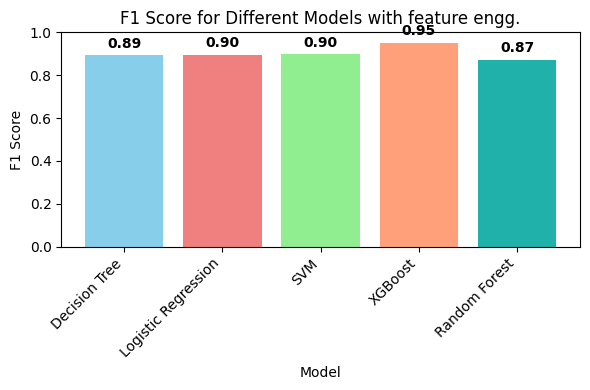

In [44]:
import matplotlib.pyplot as plt

# F1 scores for different models
model_names = ["Decision Tree", "Logistic Regression", "SVM", "XGBoost", "Random Forest"]
f1_scores = [dtf_f1_score, lrf_f1_score, svmf_f1_score, xgboostf_f1_score, rff_f1_score]

# Define custom colors for the bars
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen']

# Create a bar plot for F1 scores
plt.figure(figsize=(6, 4))  # Set the figure size to make it smaller
plt.bar(model_names, f1_scores, color=colors)
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score for Different Models with feature engg.')
plt.ylim(0, 1)  # Set the y-axis range (0 to 1)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability

# Add labels to the bars
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


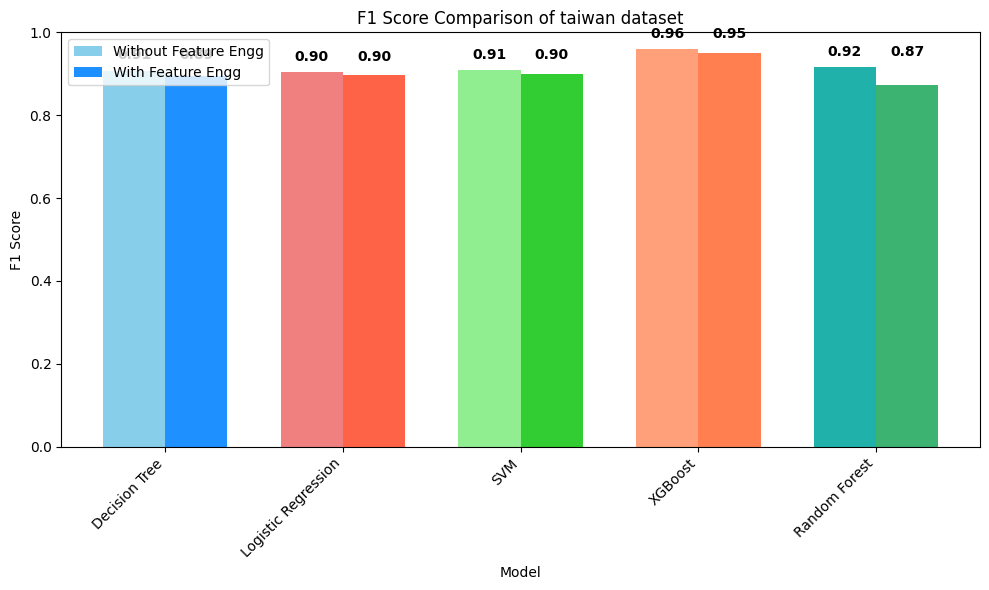

In [45]:
# percentage change graph of f1 score with feature engineering and without feature engg


import matplotlib.pyplot as plt
import numpy as np

# Model names
model_names = ["Decision Tree", "Logistic Regression", "SVM", "XGBoost", "Random Forest"]

# F1 scores without feature engineering
f1_scores_without_feature_engg = [dt_f1_score, lr_f1_score, svm_f1_score, xgboost_f1_score, rf_f1_score]

# F1 scores with feature engineering
f1_scores_with_feature_engg = [dtf_f1_score, lrf_f1_score, svmf_f1_score, xgboostf_f1_score, rff_f1_score]

# Define custom colors for bars
colors_without_feature_engg = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen']
colors_with_feature_engg = ['dodgerblue', 'tomato', 'limegreen', 'coral', 'mediumseagreen']

# Create x-axis positions for bars
x = np.arange(len(model_names))

# Set the width of the bars
bar_width = 0.35

# Create a properly sized figure
plt.figure(figsize=(10, 6))

# Create a bar plot for F1 scores with and without feature engineering
plt.bar(x - bar_width/2, f1_scores_without_feature_engg, bar_width, label='Without Feature Engg', color=colors_without_feature_engg)
plt.bar(x + bar_width/2, f1_scores_with_feature_engg, bar_width, label='With Feature Engg', color=colors_with_feature_engg)
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison of taiwan dataset')
plt.ylim(0, 1)  # Set the y-axis range (0 to 1)
plt.xticks(x, model_names, rotation=45, ha="right")  # Rotate x-axis labels for readability

# Add labels to the bars without overlapping
for i, (v1, v2) in enumerate(zip(f1_scores_without_feature_engg, f1_scores_with_feature_engg)):
    plt.text(x[i] - bar_width/2, max(v1, v2) + 0.02, f"{v1:.2f}", ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')
    plt.text(x[i] + bar_width/2, max(v1, v2) + 0.02, f"{v2:.2f}", ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

# Add a legend
plt.legend(loc="upper left")

# Show the plot
plt.tight_layout()
plt.show()



# size up and scale up and speed up

In [46]:
from pyspark.sql import SparkSession
from pyspark.ml.classification import DecisionTreeClassifier, RandomForestClassifier, GBTClassifier
from pyspark.ml.feature import VectorAssembler
import time

# Initialize a Spark session
spark = SparkSession.builder.appName("metrics").getOrCreate()

tbank_data = spark.read.csv("taiwan_resampled_data.csv", header=True, inferSchema=True)

# Selecting features and target column
feature_cols = [col_name for col_name in tbank_data.columns if col_name != 'Bankrupt?']
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
tbank_data = assembler.transform(tbank_data).select("features", "Bankrupt?")

# Splitting the dataset
train_data, test_data = tbank_data.randomSplit([0.8, 0.2], seed=42)

# Repartitioning the train_data and test_data into 4 partitions
train_data = train_data.repartition(4)
test_data = test_data.repartition(4)

# Initialize the parameters
m_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  # Dataset size factors

# Function to measure execution time
def measure_time(model, data):
    start_time = time.time()
    model.fit(data)
    end_time = time.time()
    return end_time - start_time

models = {
    "Decision Tree": DecisionTreeClassifier(featuresCol="features", labelCol="Bankrupt?"),
    "Random Forest": RandomForestClassifier(featuresCol="features", labelCol="Bankrupt?"),
    "XGBoost": GBTClassifier(featuresCol="features", labelCol="Bankrupt?")
}

for model_name, model in models.items():
    # Lists to store metrics
    sizeups = []
    speedups = []
    scaleups = []

    # Time for base dataset
    T1 = measure_time(model, train_data)
    base_count = train_data.count()

    for m in m_values:
        fraction = min(m * base_count / tbank_data.count(), 1.0)  # Cap fraction to 1.0
        other_fraction = 1 - fraction
        subset_data, _ = tbank_data.randomSplit([fraction, other_fraction], seed=42)

        # Maintain data in 4 partitions
        subset_data = subset_data.repartition(4)

        Tm = measure_time(model, subset_data)  # Time for m partitions

        # Calculate metrics
        sizeups.append(Tm / T1)
        speedups.append(T1 / Tm)
        scaleups.append((T1 / Tm) / m)

    # Print results
    print(f"--- {model_name} ---")
    print("Sizeups:", sizeups)
    print("Speedups:", speedups)
    print("Scaleups:", scaleups)
    print("\n")

spark.stop()



--- Decision Tree ---
Sizeups: [0.6700545926866168, 0.7244025297278152, 0.7531777207143839, 0.7619782602554463, 0.7632689047682013, 0.887518839901255, 0.856079700527173, 0.7824409390312427, 0.8033414607917589]
Speedups: [1.4924157089804442, 1.3804479677559063, 1.327707886860364, 1.3123733998195157, 1.3101542506879567, 1.1267366449497112, 1.168115538055862, 1.2780517354295418, 1.2448006841504458]
Scaleups: [14.92415708980444, 6.902239838779531, 4.425692956201214, 3.280933499548789, 2.6203085013759133, 1.8778944082495186, 1.668736482936946, 1.5975646692869272, 1.383111871278273]


--- Random Forest ---
Sizeups: [0.7819975749859395, 0.8455132519330653, 0.8403494336688521, 0.8681281855284116, 0.8607603761064633, 0.9062152702380102, 0.9356396396062252, 0.9576422504076533, 1.0048096084101321]
Speedups: [1.2787763440544944, 1.182713573931263, 1.1899811672795866, 1.1519036205365463, 1.1617635148627181, 1.1034905643747959, 1.0687875520332397, 1.0442312873876605, 0.9952134131980065]
Scaleups: [1

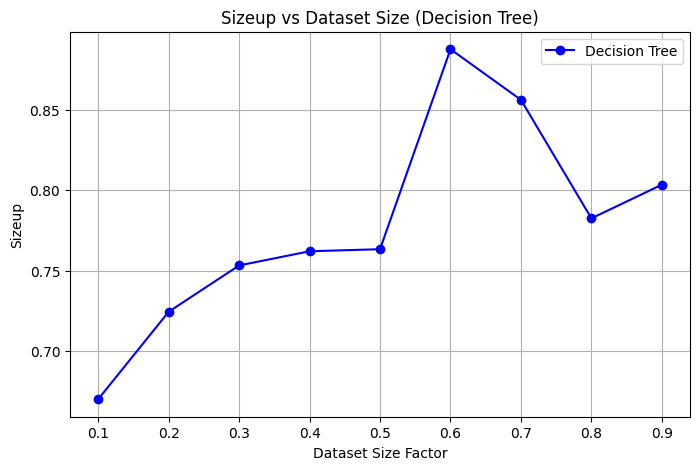

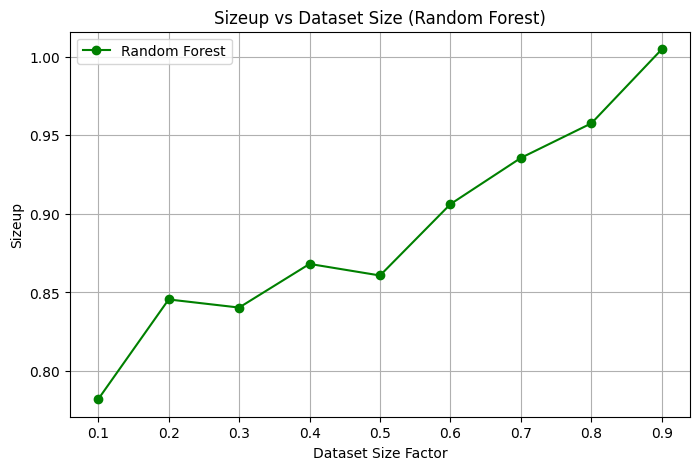

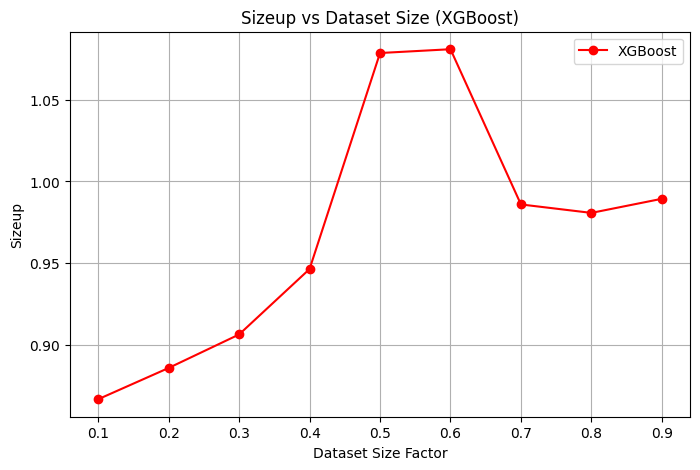

In [47]:
import matplotlib.pyplot as plt


# Arrays for sizeup metrics for Decision Tree, Random Forest, and XGBoost
sizeups_dt = [0.6700545926866168, 0.7244025297278152, 0.7531777207143839, 0.7619782602554463, 0.7632689047682013, 0.887518839901255, 0.856079700527173, 0.7824409390312427, 0.8033414607917589]
sizeups_rf = [0.7819975749859395, 0.8455132519330653, 0.8403494336688521, 0.8681281855284116, 0.8607603761064633, 0.9062152702380102, 0.9356396396062252, 0.9576422504076533, 1.0048096084101321]
sizeups_xgb = [0.8666006487184843, 0.8857491882694462, 0.9062680671818069, 0.9463313148945613, 1.0786207396614709, 1.0809437732437914, 0.9858846448592532, 0.9807093557534863, 0.9893432099230384]

# Plotting sizeup metrics for Decision Tree
plt.figure(figsize=(8, 5))
plt.plot(m_values, sizeups_dt, marker='o', linestyle='-', color='blue', label='Decision Tree')
plt.xlabel('Dataset Size Factor')
plt.ylabel('Sizeup')
plt.title('Sizeup vs Dataset Size (Decision Tree)')
plt.xticks(m_values)
plt.grid()
plt.legend()
plt.show()

# Plotting sizeup metrics for Random Forest
plt.figure(figsize=(8, 5))
plt.plot(m_values, sizeups_rf, marker='o', linestyle='-', color='green', label='Random Forest')
plt.xlabel('Dataset Size Factor')
plt.ylabel('Sizeup')
plt.title('Sizeup vs Dataset Size (Random Forest)')
plt.xticks(m_values)
plt.grid()
plt.legend()
plt.show()

# Plotting sizeup metrics for XGBoost
plt.figure(figsize=(8, 5))
plt.plot(m_values, sizeups_xgb, marker='o', linestyle='-', color='red', label='XGBoost')
plt.xlabel('Dataset Size Factor')
plt.ylabel('Sizeup')
plt.title('Sizeup vs Dataset Size (XGBoost)')
plt.xticks(m_values)
plt.grid()
plt.legend()
plt.show()


# END